In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [101]:
root_folder = "/Users/shujaali/Downloads/a97920496de01cab2eaaf4320cb2fea7e6f96190"

# Create list to store monthly ASB data
asb_data = []

# Go through each subfolder
for folder_name in sorted(os.listdir(root_folder)):
    folder_path = os.path.join(root_folder, folder_name)
    
    if os.path.isdir(folder_path):
        # Construct expected file path, e.g. "2022-05-kent-street.csv"
        csv_name = f"{folder_name}-kent-street.csv"
        csv_path = os.path.join(folder_path, csv_name)
        
        # Check if file exists
        if os.path.isfile(csv_path):
            try:
                df = pd.read_csv(csv_path)
                
                # Filter for ASB only
                df_asb = df[df["Crime type"] == "Anti-social behaviour"]
                
                # Append to list
                asb_data.append(df_asb)
                
            except Exception as e:
                print(f"Error loading {csv_path}: {e}")

# Combine all monthly ASB data into one DataFrame
asb_all = pd.concat(asb_data, ignore_index=True)

# Optional: Group by month to get trend
asb_trend = asb_all.groupby("Month").size().reset_index(name="ASB Incidents")

# Display first few rows
print(asb_trend.head())

     Month  ASB Incidents
0  2022-05           2720
1  2022-06           2552
2  2022-07           2876
3  2022-08           3237
4  2022-09           2217


In [102]:
asb_trend

,Month,ASB Incidents
0,2022-05,2720
1,2022-06,2552
2,2022-07,2876
3,2022-08,3237
4,2022-09,2217
5,2022-10,2242
6,2022-11,1678
7,2022-12,1581
8,2023-01,1801
9,2023-02,1902


In [103]:
print(df_asb.head())

   Crime ID    Month  Reported by Falls within  Longitude   Latitude  \
0       NaN  2025-04  Kent Police  Kent Police   0.967039  51.244825   
10      NaN  2025-04  Kent Police  Kent Police   0.976169  51.244629   
11      NaN  2025-04  Kent Police  Kent Police   0.925496  51.250261   
12      NaN  2025-04  Kent Police  Kent Police   0.976169  51.244629   
24      NaN  2025-04  Kent Police  Kent Police   0.879373  51.171509   

                       Location  LSOA code     LSOA name  \
0   On or near Felborough Close  E01023987  Ashford 001B   
10      On or near Parking Area  E01023988  Ashford 001C   
11   On or near Shottenden Road  E01023988  Ashford 001C   
12      On or near Parking Area  E01023988  Ashford 001C   
24       On or near Towers View  E01032810  Ashford 001F   

               Crime type Last outcome category  Context  
0   Anti-social behaviour                   NaN      NaN  
10  Anti-social behaviour                   NaN      NaN  
11  Anti-social behaviour    

In [104]:
asb_all

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2022-05,Kent Police,Kent Police,0.968272,51.255956,On or near Green Lane,E01023987,Ashford 001B,Anti-social behaviour,NaN,NaN
1,NaN,2022-05,Kent Police,Kent Police,0.959382,51.244093,On or near Parking Area,E01023987,Ashford 001B,Anti-social behaviour,NaN,NaN
2,NaN,2022-05,Kent Police,Kent Police,0.924090,51.251591,On or near Goldups Lane,E01023988,Ashford 001C,Anti-social behaviour,NaN,NaN
3,NaN,2022-05,Kent Police,Kent Police,0.958572,51.217850,On or near The Street,E01023988,Ashford 001C,Anti-social behaviour,NaN,NaN
4,NaN,2022-05,Kent Police,Kent Police,0.939416,51.182670,On or near Upper Bridge Street,E01024041,Ashford 001E,Anti-social behaviour,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
82159,NaN,2025-04,Kent Police,Kent Police,0.528952,51.097751,On or near Wheatfield Close,E01024791,Tunbridge Wells 013D,Anti-social behaviour,NaN,NaN
82160,NaN,2025-04,Kent Police,Kent Police,0.555237,51.137661,On or near Cranbrook Road,E01024803,Tunbridge Wells 013E,Anti-social behaviour,NaN,NaN
82161,NaN,2025-04,Kent Police,Kent Police,0.515451,51.046894,On or near Dickens Way,E01024807,Tunbridge Wells 014B,Anti-social behaviour,NaN,NaN
82162,NaN,2025-04,Kent Police,Kent Police,0.512997,51.047414,On or near Queen'S Mews,E01024807,Tunbridge Wells 014B,Anti-social behaviour,NaN,NaN


In [105]:
# Extract the district part from LSOA name
asb_all["District"] = asb_all["LSOA name"].str.extract(r"^([A-Za-z\s\-']+)", expand=False).str.strip()

# Get unique districts
unique_districts = sorted(asb_all["District"].dropna().unique())

print(unique_districts)

['Ashford', 'Bexley', 'Bromley', 'Canterbury', 'Dartford', 'Dover', 'Folkestone and Hythe', 'Gravesham', 'Maidstone', 'Medway', 'Sevenoaks', 'Shepway', 'Swale', 'Tandridge', 'Thanet', 'Thurrock', 'Tonbridge and Malling', 'Tunbridge Wells', 'Wealden']


In [106]:
kent_districts = [
    'Ashford', 'Canterbury', 'Dartford', 'Dover',
    'Folkestone and Hythe', 'Gravesham', 'Maidstone',
    'Medway', 'Sevenoaks', 'Swale', 'Thanet',
    'Tonbridge and Malling', 'Tunbridge Wells'
]
asb_kent_only = asb_all[asb_all["District"].isin(kent_districts)]
asb_kent_only

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,District
0,NaN,2022-05,Kent Police,Kent Police,0.968272,51.255956,On or near Green Lane,E01023987,Ashford 001B,Anti-social behaviour,NaN,NaN,Ashford
1,NaN,2022-05,Kent Police,Kent Police,0.959382,51.244093,On or near Parking Area,E01023987,Ashford 001B,Anti-social behaviour,NaN,NaN,Ashford
2,NaN,2022-05,Kent Police,Kent Police,0.924090,51.251591,On or near Goldups Lane,E01023988,Ashford 001C,Anti-social behaviour,NaN,NaN,Ashford
3,NaN,2022-05,Kent Police,Kent Police,0.958572,51.217850,On or near The Street,E01023988,Ashford 001C,Anti-social behaviour,NaN,NaN,Ashford
4,NaN,2022-05,Kent Police,Kent Police,0.939416,51.182670,On or near Upper Bridge Street,E01024041,Ashford 001E,Anti-social behaviour,NaN,NaN,Ashford
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82159,NaN,2025-04,Kent Police,Kent Police,0.528952,51.097751,On or near Wheatfield Close,E01024791,Tunbridge Wells 013D,Anti-social behaviour,NaN,NaN,Tunbridge Wells
82160,NaN,2025-04,Kent Police,Kent Police,0.555237,51.137661,On or near Cranbrook Road,E01024803,Tunbridge Wells 013E,Anti-social behaviour,NaN,NaN,Tunbridge Wells
82161,NaN,2025-04,Kent Police,Kent Police,0.515451,51.046894,On or near Dickens Way,E01024807,Tunbridge Wells 014B,Anti-social behaviour,NaN,NaN,Tunbridge Wells
82162,NaN,2025-04,Kent Police,Kent Police,0.512997,51.047414,On or near Queen'S Mews,E01024807,Tunbridge Wells 014B,Anti-social behaviour,NaN,NaN,Tunbridge Wells


In [109]:
asb_kent_only.to_csv("asb_kent.csv", index=False)


In [107]:
monthly_counts = asb_kent_only.groupby("Month").size().reset_index(name="ASB Incidents")
print(monthly_counts)

      Month  ASB Incidents
0   2022-05           2548
1   2022-06           2417
2   2022-07           2708
3   2022-08           3041
4   2022-09           2065
5   2022-10           2109
6   2022-11           1566
7   2022-12           1516
8   2023-01           1723
9   2023-02           1811
10  2023-03           1885
11  2023-04           2427
12  2023-05           2648
13  2023-06           2981
14  2023-07           2937
15  2023-08           3036
16  2023-09           2711
17  2023-10           2251
18  2023-11           1634
19  2023-12           1617
20  2024-01           1663
21  2024-02           1971
22  2024-03           2197
23  2024-04           2433
24  2024-05           2697
25  2024-06           2593
26  2024-07           2679
27  2024-08           2906
28  2024-09           1996
29  2024-10           2097
30  2024-11           1813
31  2024-12           1596
32  2025-01           1560
33  2025-02           1645
34  2025-03           2383
35  2025-04           2613


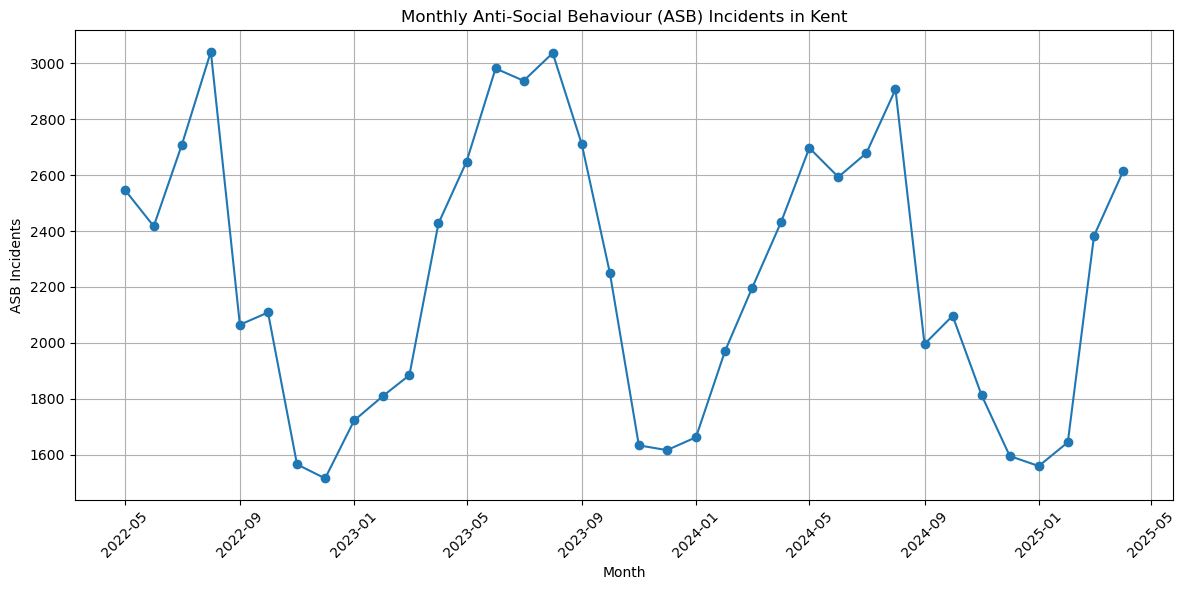

In [39]:
# Ensure Month is datetime
asb_kent_only = asb_kent_only.copy()
asb_kent_only["Month"] = pd.to_datetime(asb_kent_only["Month"])


# Group and count ASB incidents per month
monthly_counts = asb_kent_only.groupby("Month").size().reset_index(name="ASB Incidents")

# Plot the frequency polygon
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts["Month"], monthly_counts["ASB Incidents"], marker='o')
plt.title("Monthly Anti-Social Behaviour (ASB) Incidents in Kent")
plt.xlabel("Month")
plt.ylabel("ASB Incidents")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [145]:
district_counts = asb_kent_only.groupby("District").size().reset_index(name="ASB Incidents")
district_counts = district_counts.sort_values("ASB Incidents", ascending=False)
print(district_counts)

                 District  ASB Incidents
7                  Medway          14579
9                   Swale           8110
6               Maidstone           7775
10                 Thanet           7562
1              Canterbury           7010
5               Gravesham           5850
0                 Ashford           5078
3                   Dover           5062
2                Dartford           4981
11  Tonbridge and Malling           4669
12        Tunbridge Wells           3905
8               Sevenoaks           3293
4    Folkestone and Hythe           2599


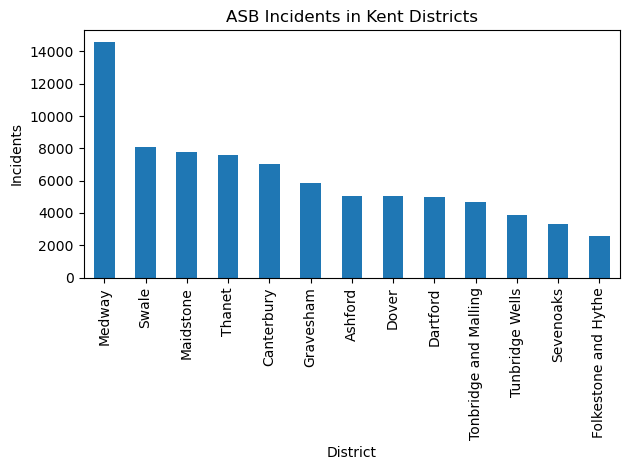

In [146]:
district_counts.plot(kind='bar', x='District', y='ASB Incidents', legend=False, title='ASB Incidents in Kent Districts')
plt.ylabel("Incidents")
plt.tight_layout()
plt.show()

Medway has the highest incident count by a long way. However, it is important to adjust for the population, and see whether Medway still outnumbers the other districts.

In [220]:
asb_data = {
    "District": district_counts["District"].tolist(),
    "ASB Incidents": district_counts["ASB Incidents"].tolist()
}
# Population figures (mid-2023 data)
population_data = {
    "District": [
        "Gravesham", "Tonbridge and Malling", "Ashford", "Canterbury", "Dartford", "Dover",
        "Folkestone and Hythe", "Maidstone", "Medway", "Sevenoaks", "Swale", "Thanet", "Tunbridge Wells"
    ],
    "Population": [
        107737, 135206, 138283, 159939, 120699, 118591,
        110995, 184187, 286800, 121262, 155893, 140439, 117020
    ]
}

In [221]:
# Convert dict to DF
population_df = pd.DataFrame(population_data)

# Merge with district_counts on the District column
district_counts_pc = district_counts.merge(population_df, on="District", how="left")
district_counts_pc

# Calculate ASB incidents per 1,000 residents
district_counts_pc["ASB per 1,000"] = (district_counts_pc["ASB Incidents"] / district_counts_pc["Population"]) * 1000

# Sort by highest density
district_counts_pc = district_counts_pc.sort_values("ASB per 1,000", ascending=False)

# Display result
print(district_counts_pc)

                 District  ASB Incidents  Population  ASB per 1,000
5               Gravesham           5850      107737      54.298895
3                  Thanet           7562      140439      53.845442
1                   Swale           8110      155893      52.022862
0                  Medway          14579      286800      50.833333
4              Canterbury           7010      159939      43.829210
7                   Dover           5062      118591      42.684521
2               Maidstone           7775      184187      42.212534
8                Dartford           4981      120699      41.267948
6                 Ashford           5078      138283      36.721795
9   Tonbridge and Malling           4669      135206      34.532491
10        Tunbridge Wells           3905      117020      33.370364
11              Sevenoaks           3293      121262      27.156075
12   Folkestone and Hythe           2599      110995      23.415469


In [45]:
# Create DFs
asb_df = pd.DataFrame(asb_data)
pop_df = pd.DataFrame(population_data)
# Merge on District
merged = pd.merge(asb_df, pop_df, on="District")

# Calculate ASB incidents per 1,000 residents
merged["ASB per 1,000"] = (merged["ASB Incidents"] / merged["Population"]) * 1000

# Sort by highest density
merged = merged.sort_values("ASB per 1,000", ascending=False)

# Display result
print(merged)

                 District  ASB Incidents  Population  ASB per 1,000
0               Gravesham           5850      107737      54.298895
11                 Thanet           7562      140439      53.845442
10                  Swale           8110      155893      52.022862
8                  Medway          14579      286800      50.833333
3              Canterbury           7010      159939      43.829210
5                   Dover           5062      118591      42.684521
7               Maidstone           7775      184187      42.212534
4                Dartford           4981      120699      41.267948
2                 Ashford           5078      138283      36.721795
1   Tonbridge and Malling           4669      135206      34.532491
12        Tunbridge Wells           3905      117020      33.370364
9               Sevenoaks           3293      121262      27.156075
6    Folkestone and Hythe           2599      110995      23.415469


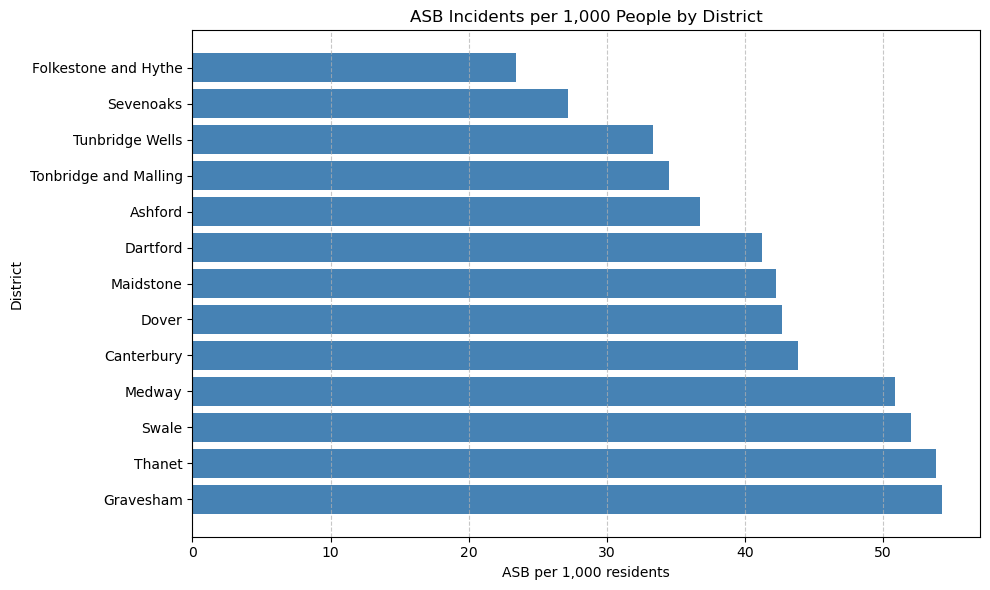

In [151]:
# Plot ASB incidents per 1,000 people by district
plt.figure(figsize=(10, 6))
plt.barh(district_counts_pc["District"], district_counts_pc["ASB per 1,000"], color='steelblue')
plt.title("ASB Incidents per 1,000 People by District")
plt.xlabel("ASB per 1,000 residents")
plt.ylabel("District")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

When adjusting for population, Medway no longer outstrips the other districts, and isn't even the highest. However, Medway is still within the upper third, crossing the 50 per 1,000 residents mark. 

In [211]:
# Filter for each year
kent_2023 = asb_kent_only[
    (asb_kent_only["Month"] >= "2023-01-01") & (asb_kent_only["Month"] <= "2023-12-31")
]
kent_2024 = asb_kent_only[
    (asb_kent_only["Month"] >= "2024-01-01") & (asb_kent_only["Month"] <= "2024-12-31")
]

# Count incidents
kent_2023_count = kent_2023.shape[0]
kent_2024_count = kent_2024.shape[0]

print(f"Kent ASB incidents in 2023: {kent_2023_count}")
print(f"Kent ASB incidents in 2024: {kent_2024_count}")

Kent ASB incidents in 2023: 27661
Kent ASB incidents in 2024: 26641


In [214]:
# New root folder - one where all of the police forces are
root_folder = "/Users/shujaali/Downloads/aef4948c15c32c776854467d750b84ea4a997aa3"

# Store results
monthly_summary = []

# Loop over each month folder
for month_folder in sorted(os.listdir(root_folder)):
    month_path = os.path.join(root_folder, month_folder)
    if not os.path.isdir(month_path):
        continue

    # Read all street files for this month into one DataFrame
    all_files = glob.glob(os.path.join(month_path, "*-street.csv"))
    
    dfs = []
    for file in all_files:
        try:
            df = pd.read_csv(file, usecols=["Crime type", "Falls within"])
            df = df[df["Crime type"] == "Anti-social behaviour"]
            dfs.append(df)
        except Exception as e:
            print(f"Error reading {file}: {e}")
    
    if not dfs:
        continue  # Skip empty month

    month_df = pd.concat(dfs, ignore_index=True)

    # Group by force and count ASB
    grouped = month_df.groupby("Falls within").size().reset_index(name="ASB Incidents")
    grouped["Month"] = month_folder

    # Separate Kent vs Others
    kent_count = grouped[grouped["Falls within"].str.lower().str.contains("kent")]["ASB Incidents"].sum()
    rest_count = grouped[~grouped["Falls within"].str.lower().str.contains("kent")]["ASB Incidents"].sum()

    monthly_summary.append({
        "Month": month_folder,
        "Kent": kent_count,
        "Rest of Britain": rest_count,
        "Kent Share (%)": (kent_count / (kent_count + rest_count)) * 100
    })

# Create summary DataFrame
summary_df = pd.DataFrame(monthly_summary)
summary_df["Month"] = pd.to_datetime(summary_df["Month"])
summary_df = summary_df.sort_values("Month")

print(summary_df)

        Month  Kent  Rest of Britain  Kent Share (%)
0  2022-05-01  2720            93276        2.833451
1  2022-06-01  2552            90008        2.757131
2  2022-07-01  2876            99234        2.816570
3  2022-08-01  3237           102326        3.066415
4  2022-09-01  2217            80000        2.696523
5  2022-10-01  2242           101310        2.165096
6  2022-11-01  1678            66928        2.445850
7  2022-12-01  1581            57120        2.693310
8  2023-01-01  1801            62123        2.817408
9  2023-02-01  1902            66472        2.781759
10 2023-03-01  1994            71540        2.711671
11 2023-04-01  2541            80430        3.062516
12 2023-05-01  2792            90411        2.995612
13 2023-06-01  2984            93656        3.087748
14 2023-07-01  2937            89382        3.181360
15 2023-08-01  3037            86065        3.408453
16 2023-09-01  2714            80384        3.266023
17 2023-10-01  2255            77243        2.

In [216]:
kent_pop_share = 1897051 / 68265209  # ≈ 2.78%
mean_kent_asb_share = summary_df["Kent Share (%)"].mean()

print(f"Kent population share: {kent_pop_share*100:.3f}%")
print(f"Mean ASB share in Kent: {mean_kent_asb_share:.3f}%")

Kent population share: 2.779%
Mean ASB share in Kent: 2.875%


In [217]:
from scipy.stats import ttest_1samp

# Test if Kent ASB share (%) is significantly greater than population share
t_stat, p_val = ttest_1samp(summary_df["Kent Share (%)"], kent_pop_share * 100)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value (two-tailed): {p_val:.5f}")

# One-tailed test (H1: ASB share > population share)
p_val_one_tailed = p_val / 2
print(f"P-value (one-tailed): {p_val_one_tailed:.5f}")

T-statistic: 2.234
P-value (two-tailed): 0.03196
P-value (one-tailed): 0.01598


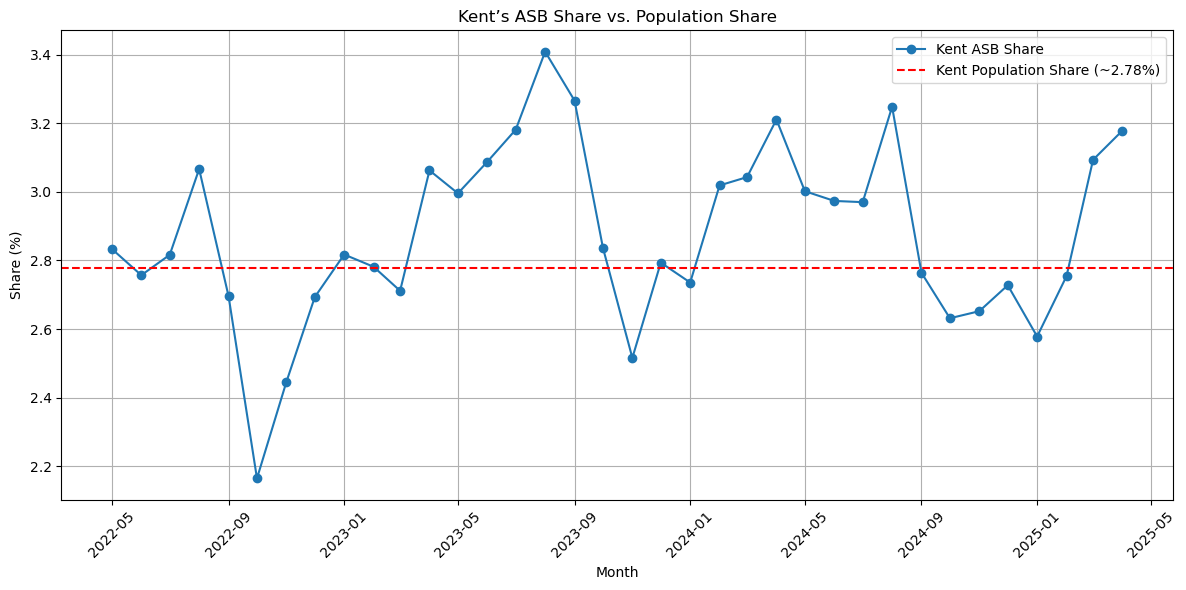

In [218]:
# Plot Kent's share of UK's ASB and compare it to Kent's population share to show proportionality
summary_df["Month"] = pd.to_datetime(summary_df["Month"])
plt.figure(figsize=(12, 6))
plt.plot(summary_df["Month"], summary_df["Kent Share (%)"], marker='o', label="Kent ASB Share")
plt.axhline(y=kent_pop_share * 100, color='red', linestyle='--', label="Kent Population Share (~2.78%)")
plt.title("Kent’s ASB Share vs. Population Share")
plt.xlabel("Month")
plt.ylabel("Share (%)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [219]:
from statsmodels.stats.proportion import proportions_ztest

# Ensure 'Month' is datetime
summary_df["Month"] = pd.to_datetime(summary_df["Month"])

# Filter by year
data_2023 = summary_df[summary_df["Month"].dt.year == 2023]
data_2024 = summary_df[summary_df["Month"].dt.year == 2024]

# Calculate totals
kent_2023 = data_2023["Kent"].sum()
uk_2023 = data_2023[["Kent", "Rest of Britain"]].sum().sum()

kent_2024 = data_2024["Kent"].sum()
uk_2024 = data_2024[["Kent", "Rest of Britain"]].sum().sum()

# Combined
kent_combined = kent_2023 + kent_2024
uk_combined = uk_2023 + uk_2024

# Kent expected proportion based on population
kent_pop = 1_897_051 # Calculated from ONS data
uk_pop = 68_265_209 # ONS data
kent_expected_prop = kent_pop / uk_pop

# Run hypothesis test
def run_ztest(kent, total, label):
    z_stat, p_val = proportions_ztest(
        count=kent,
        nobs=total,
        value=kent_expected_prop,
        alternative='larger'
    )
    print(f"\n📊 {label} ASB Hypothesis Test")
    print(f"Kent incidents: {kent:,}")
    print(f"UK total: {total:,}")
    print(f"Z-statistic: {z_stat:.3f}")
    print(f"P-value: {p_val:.50f}")
    if p_val < 0.05:
        print("✅ Kent's ASB rate is significantly higher than expected.")
    else:
        print("❌ No significant difference from expected rate.")

# Run tests
run_ztest(kent_2023, uk_2023, "2023")
run_ztest(kent_2024, uk_2024, "2024")
run_ztest(kent_combined, uk_combined, "2023–2024 Combined")


📊 2023 ASB Hypothesis Test
Kent incidents: 28,209
UK total: 945,521
Z-statistic: 11.688
P-value: 0.00000000000000000000000000000007362798796349838089
✅ Kent's ASB rate is significantly higher than expected.

📊 2024 ASB Hypothesis Test
Kent incidents: 26,649
UK total: 909,801
Z-statistic: 8.494
P-value: 0.00000000000000000997917110830461373082097354443557
✅ Kent's ASB rate is significantly higher than expected.

📊 2023–2024 Combined ASB Hypothesis Test
Kent incidents: 54,858
UK total: 1,855,322
Z-statistic: 14.301
P-value: 0.00000000000000000000000000000000000000000000010779
✅ Kent's ASB rate is significantly higher than expected.
